In [15]:
library(tidyverse)
library(tidymodels)
url <- "https://raw.githubusercontent.com/Xela-debug/datasets/main/Housing.csv"
housing_df <- read_csv(url)
set.seed(2023)

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


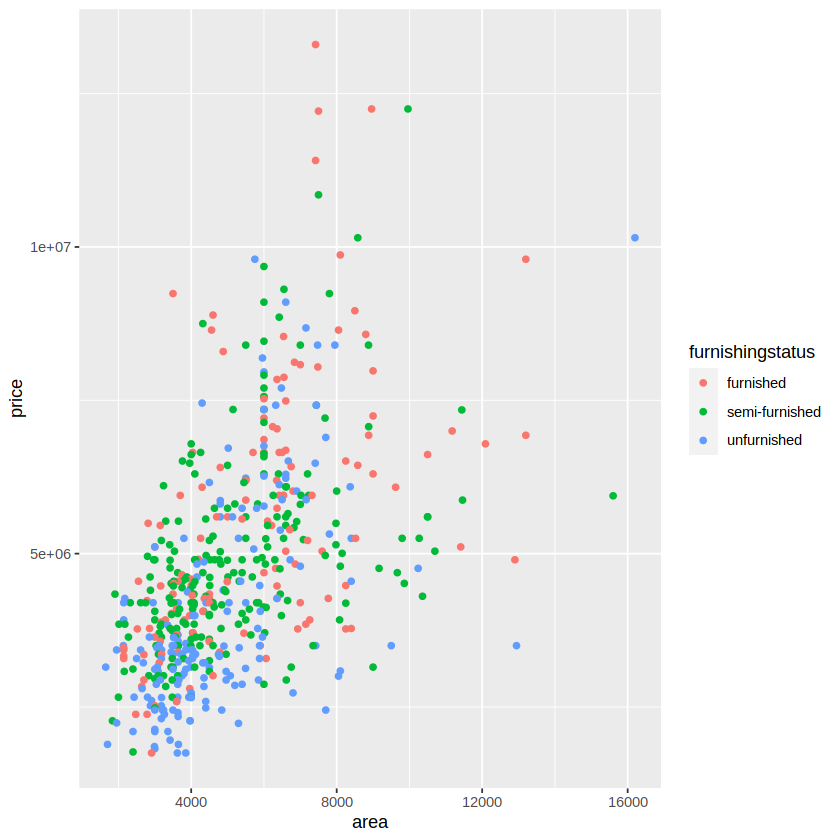

In [16]:
housing_plot <- housing_df |>
    ggplot(aes(x = area, y = price, colour = furnishingstatus)) +
        geom_point()
housing_plot

In [35]:
set.seed(2023)
housing_split <- initial_split(housing_df, prop = 0.75, strata = price)
housing_test <- testing(housing_split)
housing_train <- training(housing_split)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
housing_recipe <- recipe(price ~ area, data = housing_train)
housing_fit <- workflow() |>
    add_recipe(housing_recipe) |>
    add_model(lm_spec) |>
    fit(data = housing_train)
print(housing_fit)
lm_results <- housing_fit |>
    predict(housing_test) |>
    bind_cols(housing_test) |>
    metrics(truth = area, estimate = .pred)
lm_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         area  
  2310714.0        478.9  



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4948125
rsq,standard,1
mae,standard,4830219


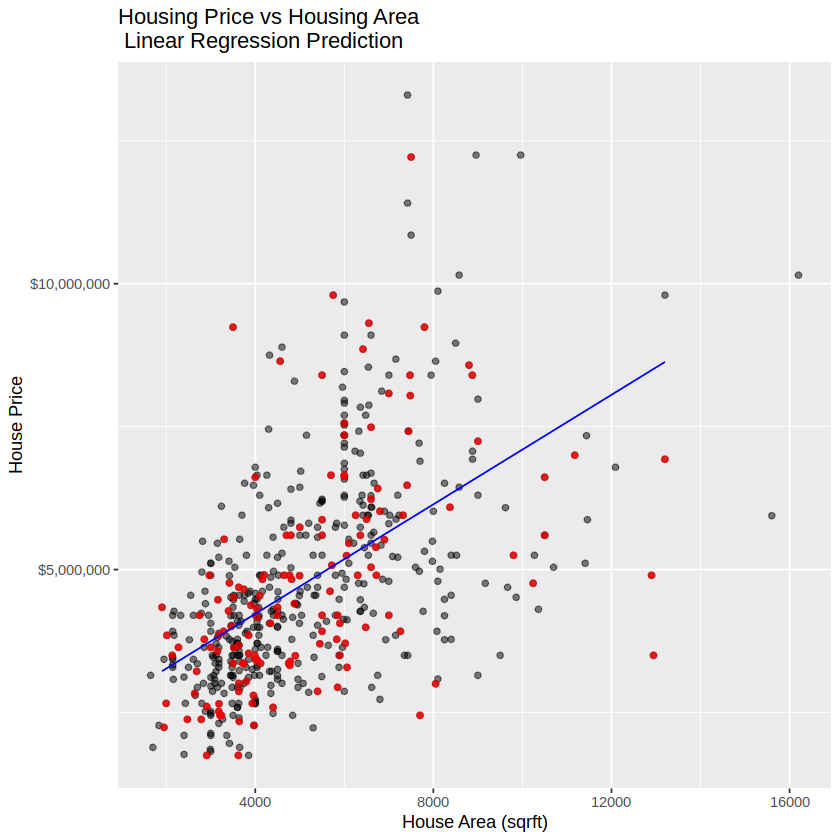

In [54]:
housing_preds <- housing_fit |>
    predict(housing_test) |>
    bind_cols(housing_test)

housing_result_plot <- housing_df |>
    ggplot(aes(x = area, y = price)) +
        geom_point(alpha = 0.5) +
        geom_point(data = housing_test,
                  colour = "red",
                  alpha = 0.7) +
        geom_line(data = housing_preds,
                 mapping = aes(x = area, y = .pred),
                 colour = "blue") +
        labs(x = "House Area (sqrft)", y = "House Price", title = "Housing Price vs Housing Area \n Linear Regression Prediction") +
        scale_y_continuous(labels = dollar_format())
housing_result_plot

In [72]:
housing_preds <- housing_fit |>
    predict(housing_df) |>
    bind_cols(housing_df)

housing_cheap <- housing_preds |>
    filter(price < .pred)
percentage_of_cheaper_homes <- nrow(housing_cheap) / nrow(housing_df) * 100
percentage_of_cheaper_homes

housing_expensive <- housing_preds |>
    filter(price > .pred)
percentage_of_more_expensive_homes <- nrow(housing_expensive) / nrow(housing_df) * 100
percentage_of_more_expensive_homes

[1] 56.14679

[1] 43.85321